## Import IRAS cost of tax collection dataset

In [1]:
import pandas as pd

IRAS_cost = pd.read_csv('cost-of-tax-collection-annual/cost-of-tax-collection.csv')
IRAS_cost.head(10)

,financial_year,cost_per_dollar_of_tax_collected
0,2000,0.87
1,2001,0.90
2,2002,0.99
3,2003,1.01
4,2004,1.02
5,2005,0.93
6,2006,0.83
7,2007,0.77
8,2008,0.80
9,2009,0.88


In [2]:
import numpy as np

X_train = np.array(IRAS_cost['financial_year']).reshape(-1, 1)
y_train = np.array(IRAS_cost['cost_per_dollar_of_tax_collected']).reshape(-1, 1)

## Run Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
X_pred = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)
y_pred = regressor.predict(X_pred)

X_pred_df = pd.DataFrame(X_pred, columns = ['financial_year'])
y_pred_df = pd.DataFrame(y_pred, columns = ['cost_per_dollar_of_tax_collected'])

cost_prediction = pd.concat([X_pred_df, y_pred_df], axis = 1)
cost_prediction

,financial_year,cost_per_dollar_of_tax_collected
0,2020,0.775947
1,2021,0.767895
2,2022,0.759842
3,2023,0.751789


In [5]:
cost_df = IRAS_cost.copy()
cost_df = cost_df.append(cost_prediction)
cost_df = cost_df.reset_index(drop=True)
cost_df.tail(5)

,financial_year,cost_per_dollar_of_tax_collected
19,2019,0.780000
20,2020,0.775947
21,2021,0.767895
22,2022,0.759842
23,2023,0.751789


#### Therefore cost per dollar of tax collection  is projected to be 0.752 cents in 2023.

## Data Visualisation

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

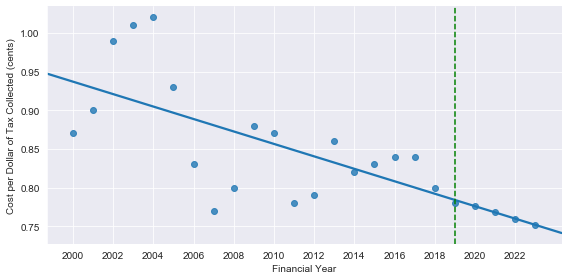

In [10]:
p = sns.lmplot(x="financial_year", y="cost_per_dollar_of_tax_collected", data=cost_df, 
               ci = None, height = 4, aspect = 2)
plt.axvline(x=2019, color = 'g', ls = '--')

p.set_axis_labels("Financial Year", "Cost per Dollar of Tax Collected (cents)")
p.set(xticks=np.arange(2000,2023+1,2))